In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

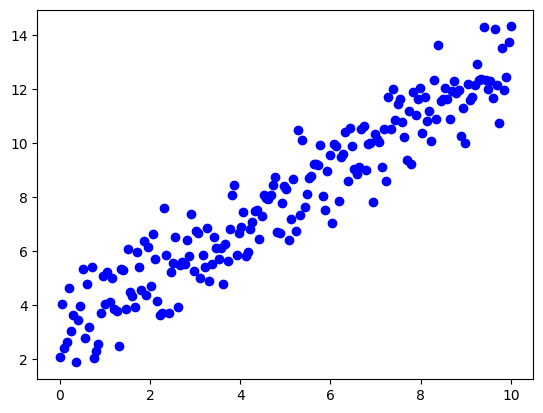

In [ ]:
# y = 1*x + 3
# y = a*x + b
# 0 < x < 10
a = 1
b = 3
lx = np.linspace(0, 10, 200)
ly = a*lx + b
ruido = np.random.randn(200)
ly = ly + ruido

plt.scatter(lx, ly, color="b")



In [ ]:
a = 10
b = 9


In [ ]:
def predice(x):
  y_hat = a*x + b
  return y_hat

# se pasan las x y las y reales y devulve el array de errores de cada x
def error(x, y):
  y_hat = predice(x)
  err = y_hat - y
  return err

# se le pasan las x y las y reales y devuelve el coste cuadrático medio
# 1/(2n) * ∑(yi_hat - yi)²
def coste(x, y):
  err = error(x, y)
  c = err**2
  c = c.mean()
  c = c/2
  return c

#1/n ∑(yi_hat -yi)*xi
def deriva_coste_respecto_a(x, y):
  err = error(x,y)
  d = err*x
  d = d.mean()
  return d

def deriva_coste_repecto_a_aprox(x, y):
  global a
  inc = 0.001
  c1 = coste(x, y)
  a = a + inc
  c2 = coste(x, y)
  a = a - inc
  d = (c2-c1)/inc
  return d



#1/n ∑(yi_hat -yi)=err
def deriva_coste_respecto_b(x, y):
  d = error(x,y)
  d = d.mean()
  return d

def deriva_coste_repecto_b_aprox(x, y):
  global b
  inc = 0.001
  c1 = coste(x, y)
  b = b + inc
  c2 = coste(x, y)
  b = b - inc
  d = (c2-c1)/inc
  return d

# r2 o coeficiente de detrminacion
def calc_accuracy(x, y):
  err = error(x,y)
  numerador = (err ** 2).sum()
  denominador = ((y - y.mean()) ** 2).sum()
  return 1 - numerador/denominador



pru_x  [0.50251256 2.51256281 5.02512563]
pru_y  [3.64217226 5.05358334 7.51803653]
estimados por el modelo  [3.50251256 5.51256281 8.02512563]
error  [-0.13965969  0.45897948  0.5070891 ]
coste  0.08121772468892542


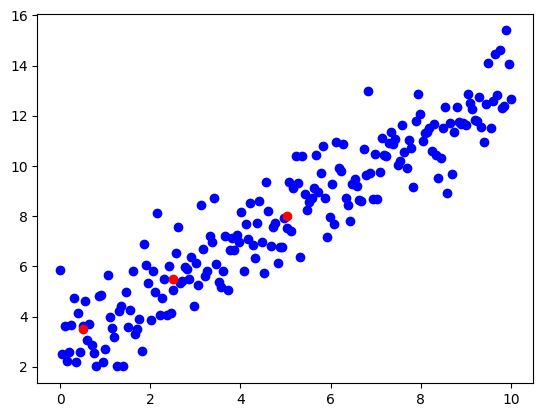

In [ ]:
plt.scatter(lx, ly, color="b")
pru_x = np.array([lx[10], lx[50], lx[100]])
pru_y = np.array([ly[10], ly[50], ly[100]])

y_hat = predice(pru_x)
plt.scatter(pru_x, y_hat, color="r")
le = error(pru_x, pru_y )
c = coste(pru_x, pru_y)
print("pru_x ", pru_x)
print("pru_y ", pru_y)
print("estimados por el modelo ", y_hat)
print("error ", le)
print("coste ", c)


In [ ]:
#pru_x = np.array([lx[10], lx[50], lx[100]])
#pru_y = np.array([ly[10], ly[50], ly[100]])
pru_x = lx
pru_y = ly
lr = 0.01
a = 10
b = 9

In [ ]:
def fit(x_train, y_train, batch_size=None, lr = 0.01,
              epochs=100, x_test = None, y_test = None):
  global a, b
  la = []
  lb = []
  lloss = []
  lloss_test = []
  if batch_size is None: batch_size = len(x_train)
  nbatchs = len(x_train)//batch_size

  for _ in range(epochs):
    # barajar
    laux = [i for i in range(len(x_train))]
    random.shuffle(laux)
    x_new = np.array([x_train[i] for i in laux])
    y_new = np.array([y_train[i] for i in laux])
    x_train = x_new
    y_train = y_new

    for lote in range(nbatchs):
      sl1 = lote*batch_size
      sl2 = sl1 + batch_size
      x_t = x_train[sl1:sl2]
      y_t = y_train[sl1:sl2]
      da = deriva_coste_respecto_a(x_t, y_t)
      db = deriva_coste_respecto_b(x_t, y_t)
      a = a - lr*da
      b = b - lr*db
      loss = coste(x_t, y_t)
      loss_test = 0
      if x_test is not None: loss_test = coste(x_test, y_test)
      la.append(a); lb.append(b); lloss.append(loss); lloss_test.append(loss_test)
      #print(f"a: {a}  b: {b} loss: {loss}")
  return lloss, lloss_test, la, lb

a: 0.809231911278601  b: 4.190701492015871 loss: 0.6897194348350426 r2 = 0.8888516189915554


(0.0, 10.0)

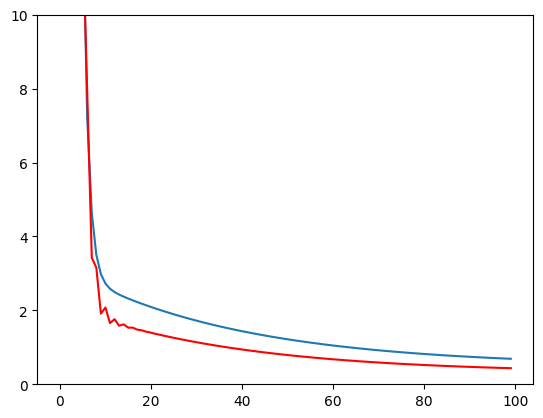

In [ ]:
a = 10
b = 9



lg = int(0.8 * len(lx))

laux = [i for i in range(len(lx))]
random.shuffle(laux)
x_n = np.array([lx[i] for i in laux])
y_n = np.array([ly[i] for i in laux])

lx_train = x_n[:lg]
ly_train = y_n[:lg]
lx_test = x_n[lg:]
ly_test = y_n[lg:]

#lx_train = lx[:lg]
#ly_train = ly[:lg]
#lx_test = lx[lg:]
#ly_test = ly[lg:]


lloss, lloss_test, la, lb = fit(lx_train, ly_train, lr=0.05, epochs=100,
                                batch_size=None, x_test = lx_test, y_test = ly_test)
print(f"a: {la[-1]}  b: {lb[-1]} loss: {lloss[-1]} r2 = {calc_accuracy(lx_test, ly_test)}")

plt.plot(range(len(lloss)), lloss)
plt.plot(range(len(lloss_test)), lloss_test, color="r")
plt.ylim(0,10)


In [ ]:
c_train = coste(lx_train, ly_train)
c_test = coste(lx_test, ly_test)
r2_train = calc_accuracy(lx_train, ly_train)
r2_test = calc_accuracy(lx_test, ly_test)
print(f"c_train: {c_train} c_test: {c_test} r2_train: {r2_train} r2_test: {r2_test}")

c_train: 0.6897194348350426 c_test: 0.43532593112797785 r2_train: 0.8555198700339779 r2_test: 0.8888516189915554


1.0251970753568715 2.867348724682851 [ 0 10] [ 2.86734872 13.11931948]


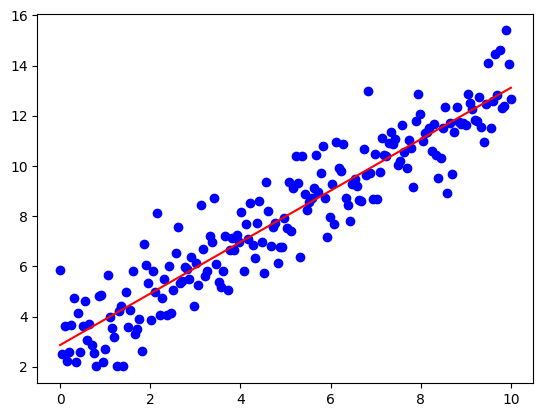

In [ ]:
plt.scatter(lx, ly, color="b")
xpru = np.array([0, 10])
ypru = predice(xpru)
print(a, b, xpru, ypru)
plt.plot(xpru, ypru, color="r")

In [ ]:
from matplotlib import animation
from matplotlib import rc
rc('animation', html='html5')


def drawframe(n):
    global line
    if(n < len(la)):
      a1 = la[n]
      b1 = lb[n]
      x1 = [0, 10]
      y1 = [b1, 10*a1 + b1]
      line.set_data(x1, y1)
    #ax.set_title(f'epoch = {n/len(x):4d}'.format(n))
    return (line,)  #OJO!!! hay que retornar una tupla!!!!

global line
def dibuja_evolucion():
  global line
  fig = plt.figure()
  ax = plt.axes()
  line,  = ax.plot([0, 10], [b, 10*a + b], color="y")
  ax.scatter(lx, ly)
  # blit=True re-draws only the parts that have changed.
  anim = animation.FuncAnimation(fig, drawframe, frames=len(la)-1, interval=5, blit=False, repeat=False)
  return anim

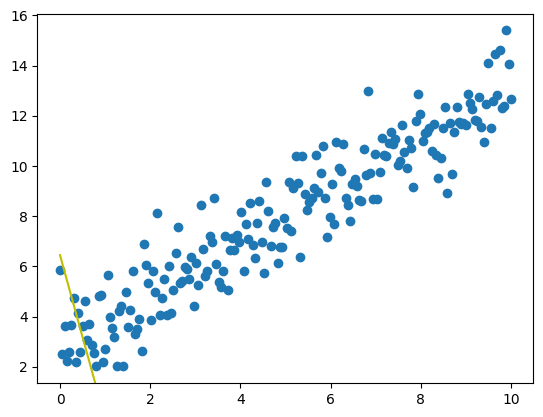

In [ ]:
anim = dibuja_evolucion()
anim